In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv("./data_paper/Force15kgf.csv")
data.head()

,Unnamed: 0,Cycle,max.,min.,max.-min.,CIV,CCVIS,CCVES,CVIS (dt),CVES (dt),DIV,DVSOC50,SOH
0,0,1,1357.5,1283.5,72.82119,2.4414,11.036,1.680,0.01614,0.000072,2.5081,3.2522,1.00000
1,1,2,1357.7,1285.9,72.41452,2.7008,11.118,1.590,0.02041,0.000160,2.5014,3.2517,1.00134
2,2,3,1357.7,1286.0,72.05853,2.7048,11.090,1.680,0.02021,0.000129,2.5023,3.2520,1.00188
3,3,4,1357.8,1286.5,71.75321,2.7065,11.042,1.636,0.01887,0.000146,2.5049,3.2520,1.00215
4,4,5,1357.9,1286.7,71.49856,2.7071,11.020,1.624,0.01857,0.000180,2.5057,3.2519,1.00202


In [3]:
print(data['Cycle'].max())

558


In [4]:
from sklearn.preprocessing import MinMaxScaler

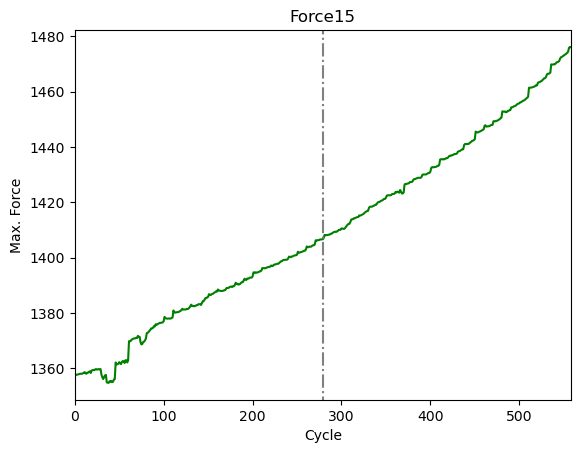

In [5]:
x= data['Cycle']
y= data['max.']
plt.plot(x,y,'g-')
plt.title("Force15")
plt.xlabel("Cycle")
plt.ylabel("Max. Force")
plt.xlim([0,len(x)])

plt.axvline(len(x)/2,-0.2,1.2,color='gray',linestyle='dashdot')


In [6]:
def bisquare(x):
    x=abs(x)
    res=[]
    for v in x:
        if v<1:
            res.append((1-v**2)**2)
        else:
            res.append(0)
    return np.array(res)

def tricube(x):
    x=abs(x)
    res=[]
    for v in x:
        if v<1:
            res.append((1-v**3)**3)
        else:
            res.append(0)
    return np.array(res)

def get_n_th_distance(x,y,n):
    y=np.array(y)
    distance=abs(y-x)
    distance=np.sort(distance)
    return distance[n-1]


In [7]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [7]:
import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 
fitted_value=fitted_value.reshape(-1)


print(fit.summary())

    
t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    max_fit=new_fitted_value
    

print(max_fit)       

    

    

C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            WLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.202e+04
Date:                Wed, 06 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:50:19   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1095.9958     61.454     17.835      0.0

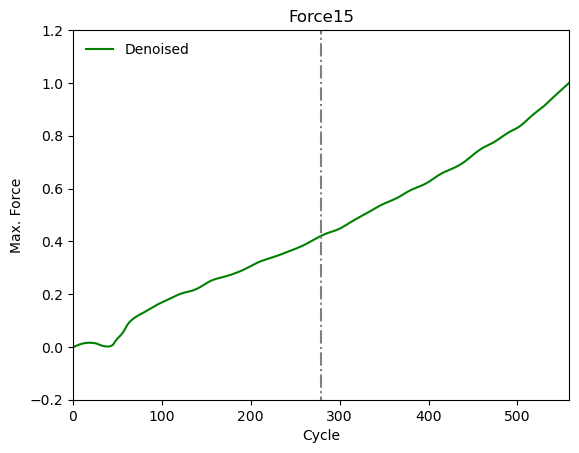

In [8]:
x= data['Cycle']
y= max_fit
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.plot(x,y_dat,'g-',label='Denoised')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15")
plt.xlabel("Cycle")
plt.ylabel("Max. Force")
plt.xlim([0,len(x)])
plt.ylim([-0.2,1.2])
plt.axvline(len(x)/2,-0.2,1.2,color='gray',linestyle='dashdot')
plt.show()



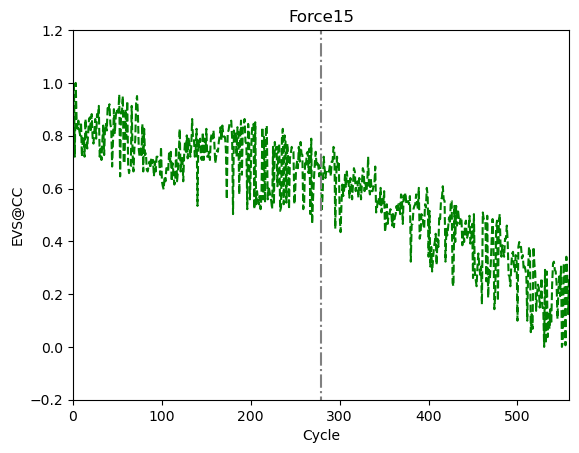

In [9]:
x= data['Cycle']
y= data['CCVES']
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.plot(x,y_dat,'g--')
plt.title("Force15")
plt.xlabel("Cycle")
plt.ylabel("EVS@CC")
plt.xlim([0,len(x)])
plt.ylim([-0.2,1.2])
plt.axvline(len(x)/2,-0.2,1.2,color='gray',linestyle='dashdot')

In [10]:
x=np.array([9,8,7,40,100,4,1000,2])
print(x)
l=np.partition(x,3)
print(l)
k=np.partition(x,3)[3]
print(k)
# 무조건 (array, 몇개의 작은 수 뽑을 건지) 지정하고 뽑은 작은 수를 왼쪽에 무작위로
# 배열한 다음 [] 안의 숫자는 그 배열에서 []의 위치의 숫자를 반환
# 0 base라서 [3]은 네번째 숫자이다

t=np.where(x<3)[0]
print(t)

[   9    8    7   40  100    4 1000    2]
[   2    4    7    8    9  100 1000   40]
8
[7]


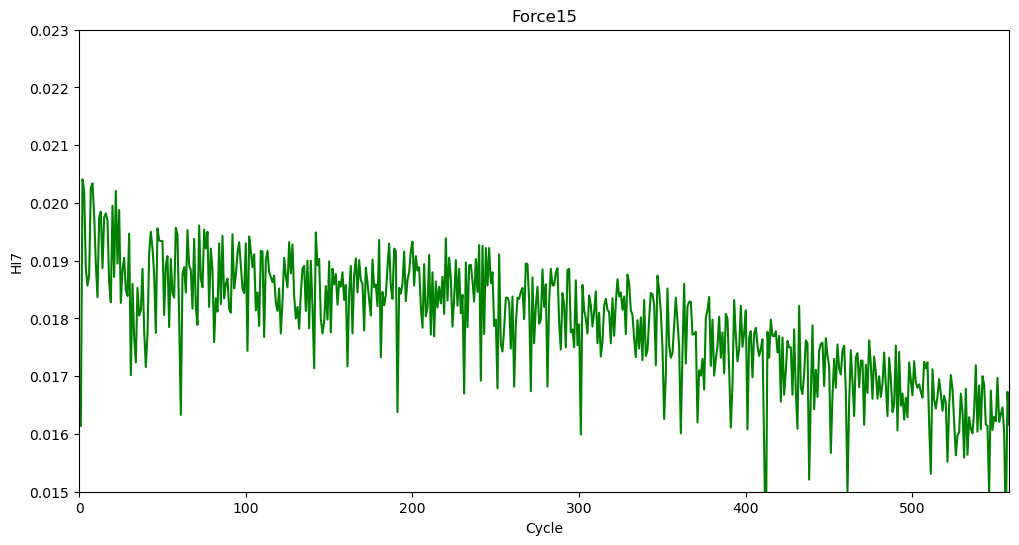

In [11]:
x= data['Cycle']
y= data['CVIS (dt)']
plt.figure(figsize=(12,6))
plt.plot(x,y,'g-')
plt.title("Force15")
plt.xlabel("Cycle")
plt.ylabel("HI7")

plt.xlim([0,len(x)])
plt.ylim(0.015,0.023,0.001)
plt.show()


In [12]:
import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)
    
    


(558,)
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            WLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     8.191
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           0.000312
Time:                        10:50:22   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1481      0.063     -2.355  

C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


In [13]:
t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    


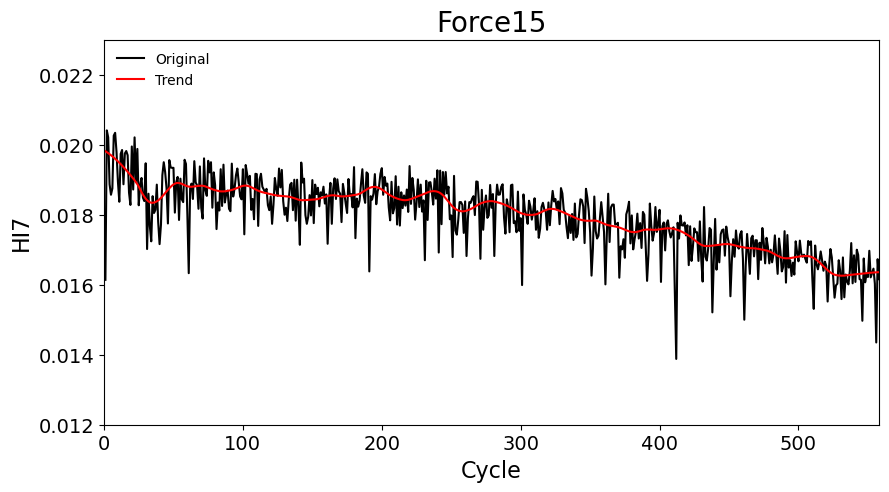

In [14]:
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['CVIS (dt)']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])
plt.ylim(0.012,0.023,0.001)
plt.show()




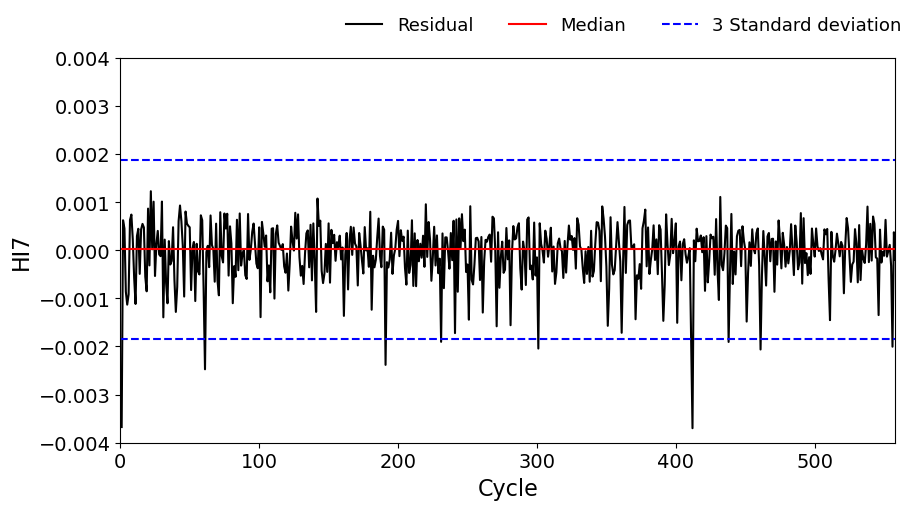

In [15]:
x= data['Cycle']
y_origin= data['CVIS (dt)']
y_trend= fitted_value

y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])
plt.ylim(-0.004,0.004,0.002)
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+3*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-3*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()





In [16]:
median=np.median(y_res)
std=np.std(y_res)
print(median)
print(std)
print(y_res.shape)
y_origin_sel=data.loc[data['Cycle']==3,'max.'].iloc[0]
print(y_origin_sel)
data_res=list(zip(x,y_res))
x_values = [y_res for x, y_res in data_res if x == 1]
# x에 대응하는 y_res를 출력해라. 이때 y_res는 data_res에서 x==1일때이다. 
print(x_values)
# 1부터 시작
print(len(y_res))

1.5765004233513763e-05
0.0006218136445735259
(558,)
1357.7
[-0.0036739465465340237]
558


In [17]:
denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if (-3)*std<=t<=3*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CVIS (dt)'].iloc[0]
    else :
        if cycle==1:
            denoised_val=data.loc[data['Cycle']==cycle+1,'CVIS (dt)'].iloc[0]
        elif cycle==len(y_res):
            denoised_val=data.loc[data['Cycle']==cycle-1,'CVIS (dt)'].iloc[0]
        else :
            denoised_num=closer_number(median,cycle)
            denoised_val=data.loc[data['Cycle']==denoised_num,'CVIS (dt)'].iloc[0]
    denoised.append(denoised_val)
    cycle +=1

y_denoised=np.array(denoised)


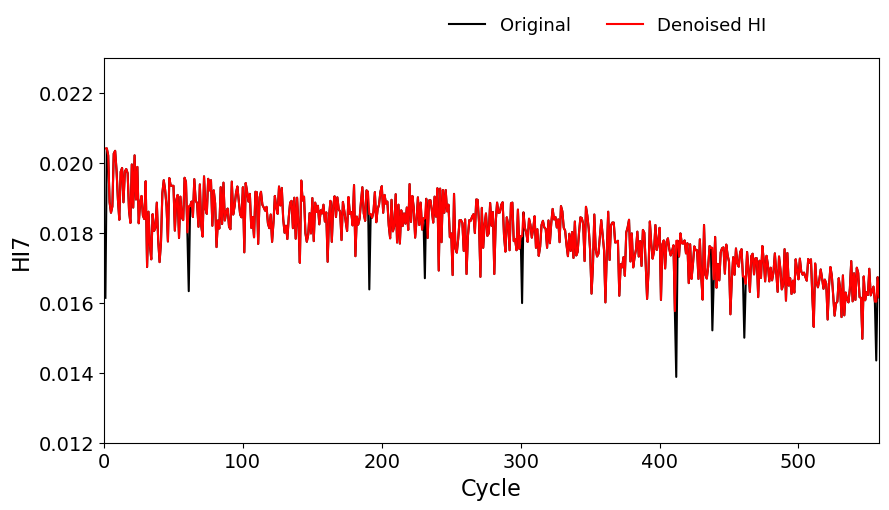

In [18]:

plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])
plt.ylim(0.012,0.023)

plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()



In [19]:
n=np.median([6,7])
print(n)

6.5


(558,)


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            WLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.202e+04
Date:                Wed, 06 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:45:42   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1095.9958     61.454     17.835      0.0

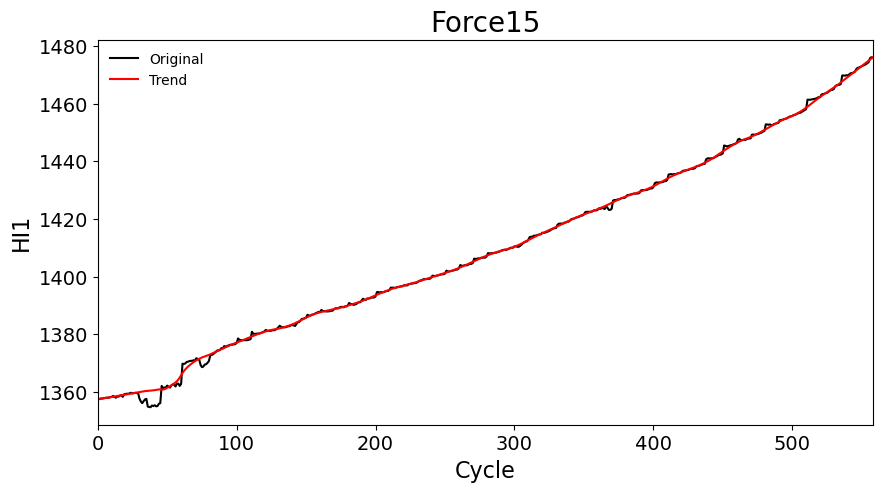

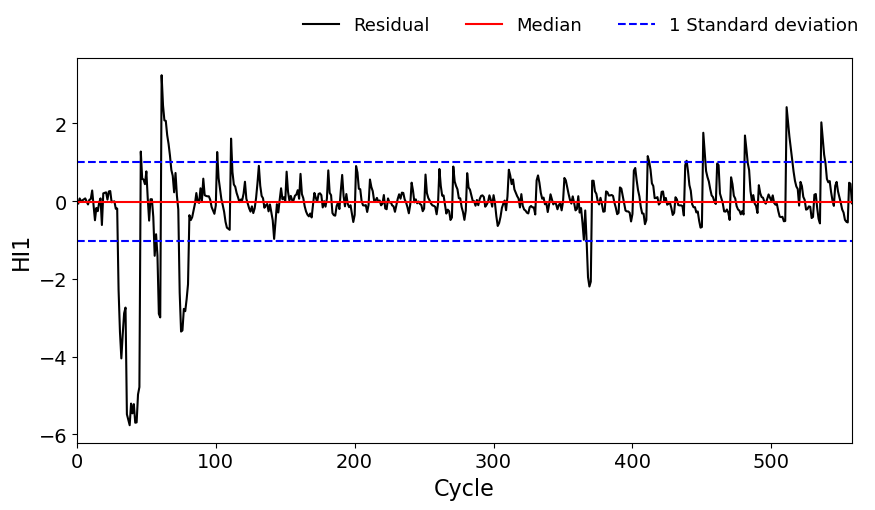

30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
59
60
61
62
63
64
74
75
76
77
78
79
80
369
370
511
512
536


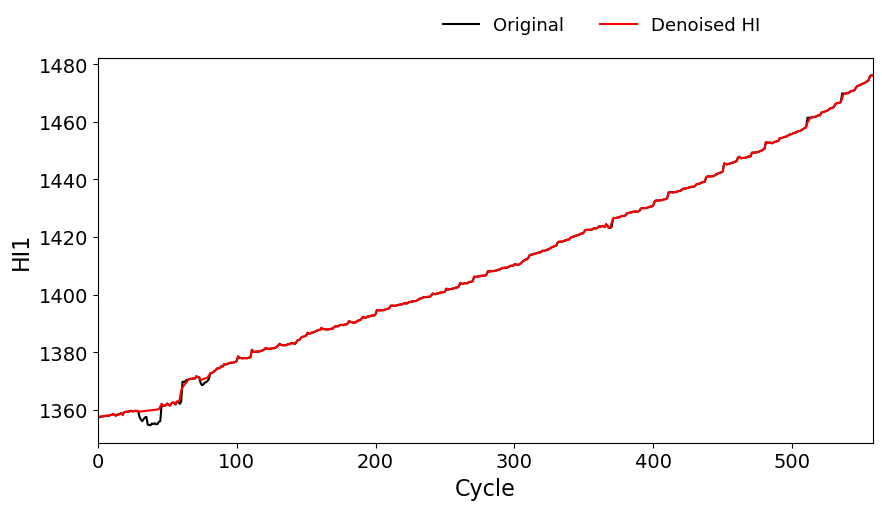

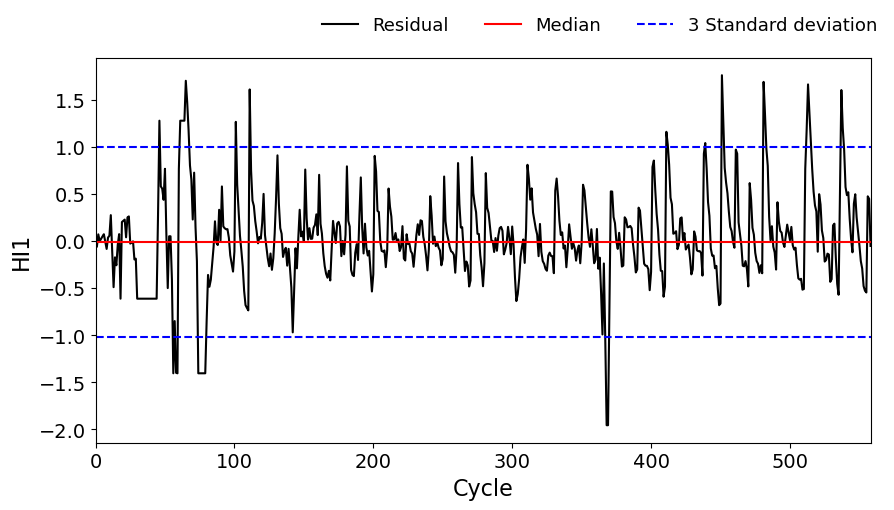

outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier


In [357]:
##############################################################
##############################################################

x= data['Cycle']
y= data['max.']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['max.']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    #t=y_res[cycle-1]
    
    if (-2)*std<=t<=2*std:
        denoised_val=data.loc[data['Cycle']==cycle,'max.'].iloc[0]
    else :
        print(cycle)
        if cycle==1:
            denoised_val=data.loc[data['Cycle']==cycle+1,'max.'].iloc[0]
        elif cycle==len(y_res):
            denoised_val=data.loc[data['Cycle']==cycle-1,'max.'].iloc[0]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            
            
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_max=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_max,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

#########

plt.figure(figsize=(10,5))
plt.plot(x, y_denoised_max-y_trend,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


y_res_2=y_denoised_max-y_trend
for t in y_res_2:
    if t>(1*std) or t<-(1*std):
        print("outlier")
    else:
        pass




(558,)


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            WLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.394e+04
Date:                Wed, 06 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:45:45   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1054.9563     39.748     26.541      0.0

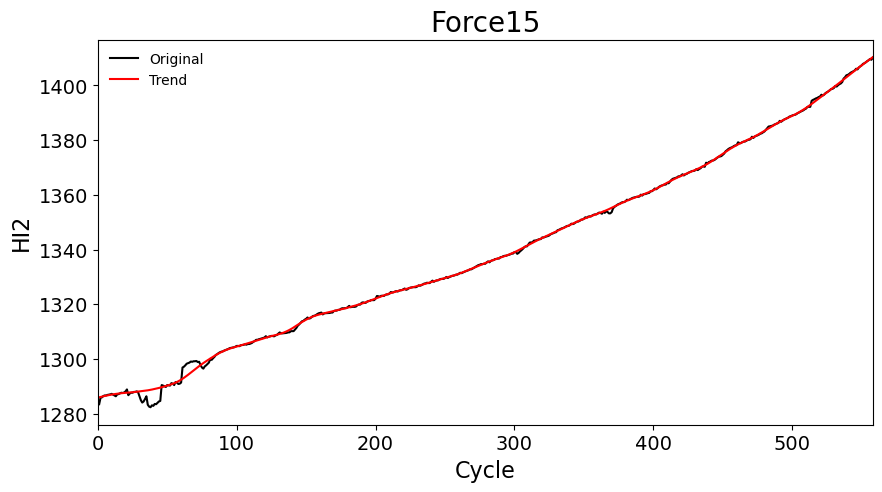

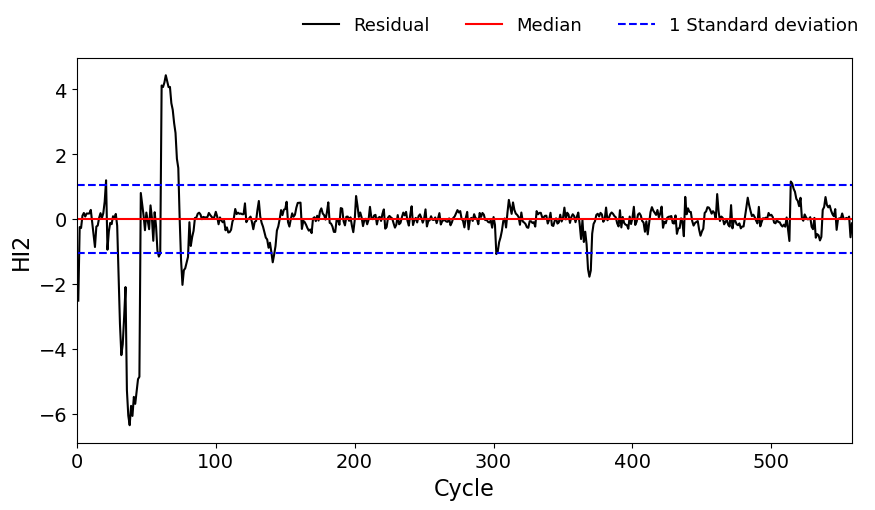

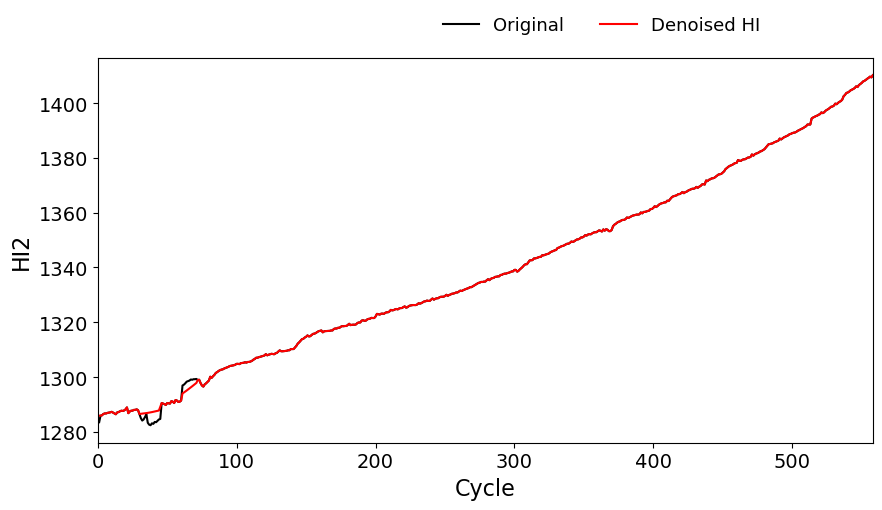

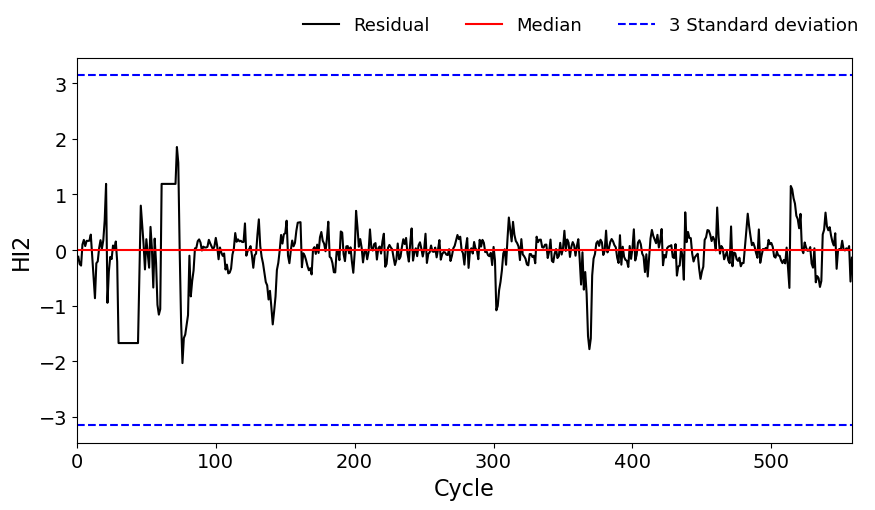

In [358]:
x= data['Cycle']
y= data['min.']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['min.']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if (-2)*std<=t<=2*std:
        denoised_val=data.loc[data['Cycle']==cycle,'min.'].iloc[0]
    else :
        if cycle==1:
            denoised_val=data.loc[data['Cycle']==cycle+1,'min.'].iloc[0]
        elif cycle==len(y_res):
            denoised_val=data.loc[data['Cycle']==cycle-1,'min.'].iloc[0]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            
            
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_min=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_min,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

#########

plt.figure(figsize=(10,5))
plt.plot(x, y_denoised_min-y_trend,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+3*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-3*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


y_res_2=y_denoised_min-y_trend
for t in y_res_2:
    if t>(3*std) or t<-(3*std):
        print("outlier")
    else:
        pass



(558,)


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.589
Model:                            WLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     397.1
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          8.90e-108
Time:                        15:45:48   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4760     31.313     -0.271      0.7

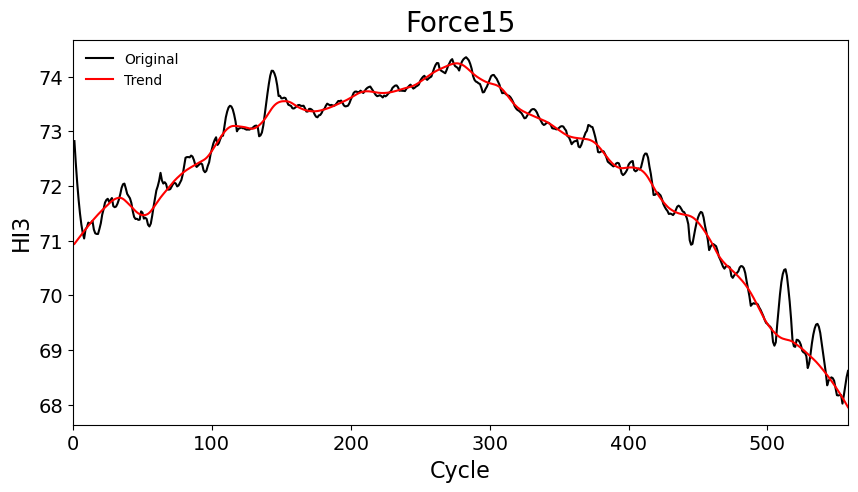

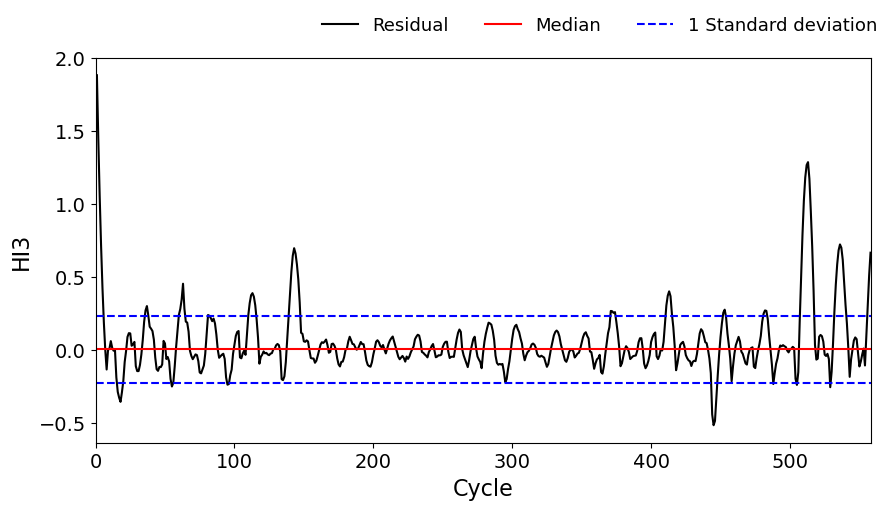

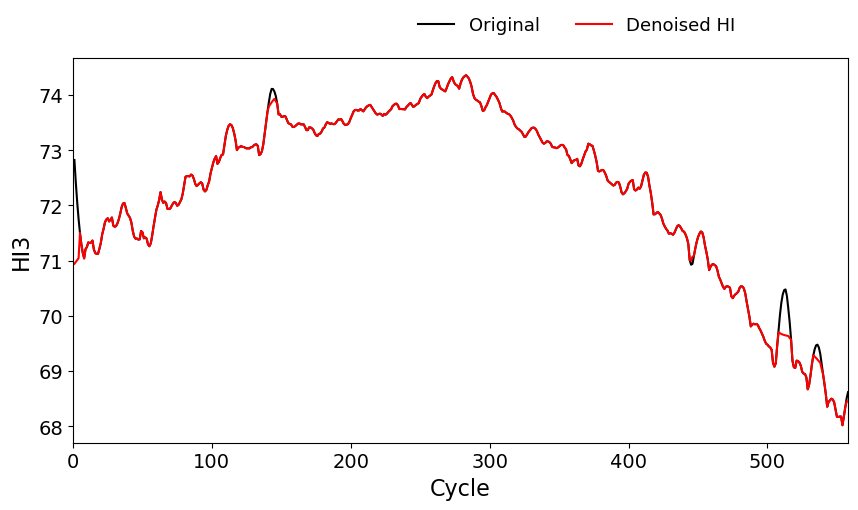

In [359]:
x= data['Cycle']
y= data['max.-min.']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['max.-min.']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI3",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI3",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if (-2)*std<=t<=2*std:
        denoised_val=data.loc[data['Cycle']==cycle,'max.-min.'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
           
            
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_maxmin=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_maxmin,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI3",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(558,)


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.226
Model:                            WLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     81.02
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           1.35e-31
Time:                        15:45:50   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7813      2.464      4.781      0.0

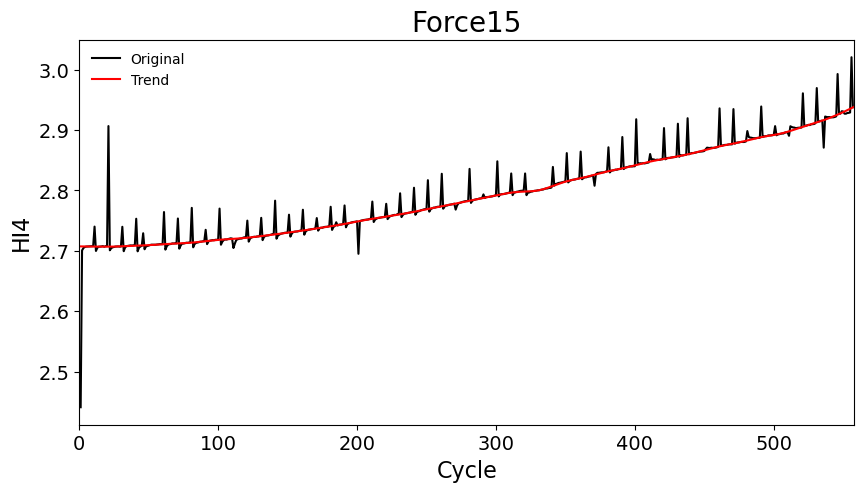

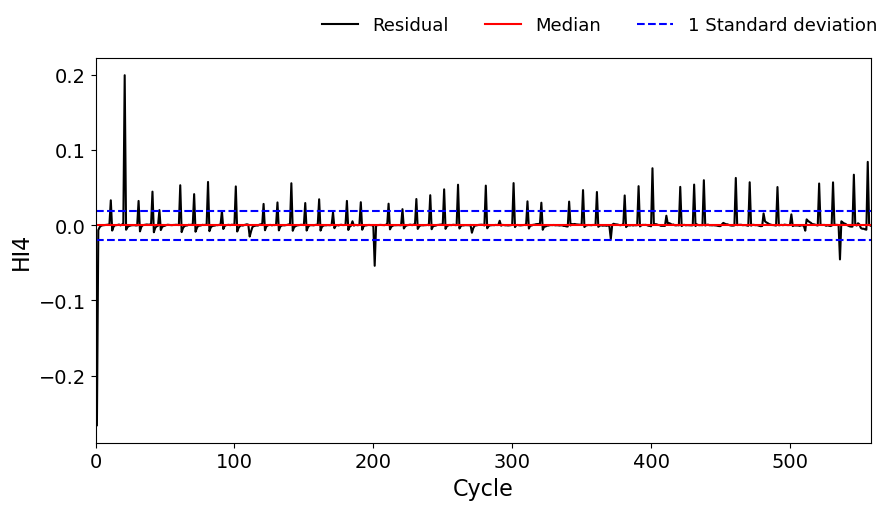

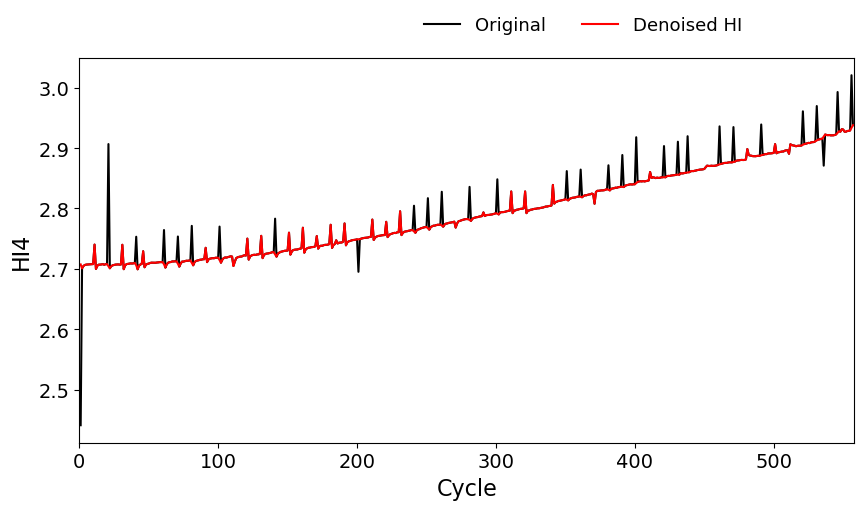

In [360]:
x= data['Cycle']
y= data['CIV']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['CIV']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI4",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI4",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if (-2)*std<=t<=2*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CIV'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_civ=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_civ,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI4",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(558,)


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.319
Model:                            WLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     129.9
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           5.32e-47
Time:                        15:45:53   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1135      4.076      2.727      0.0

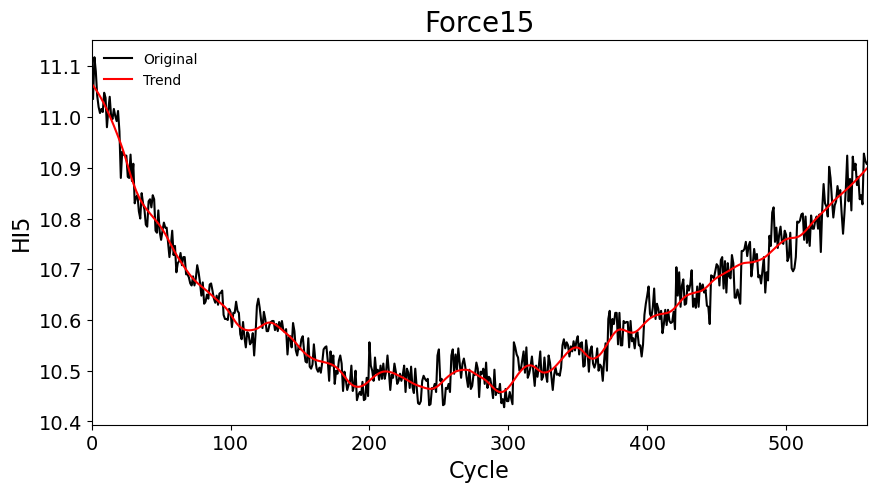

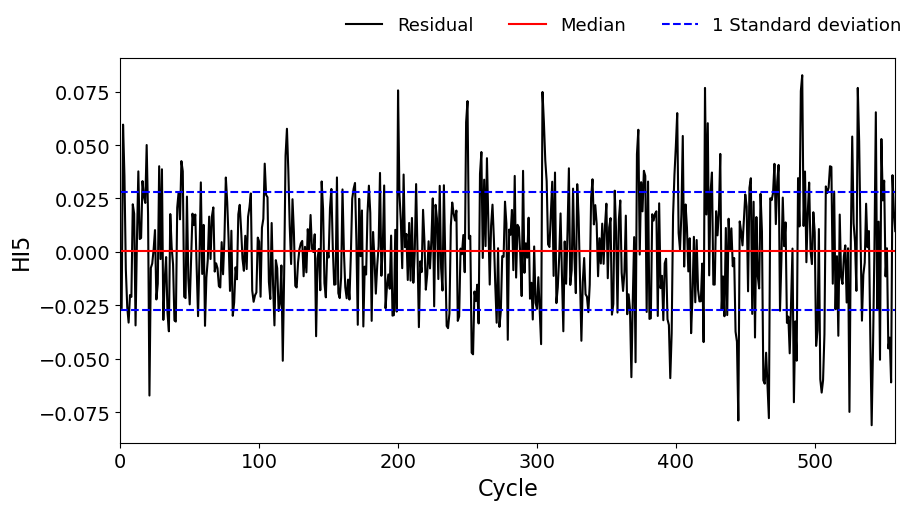

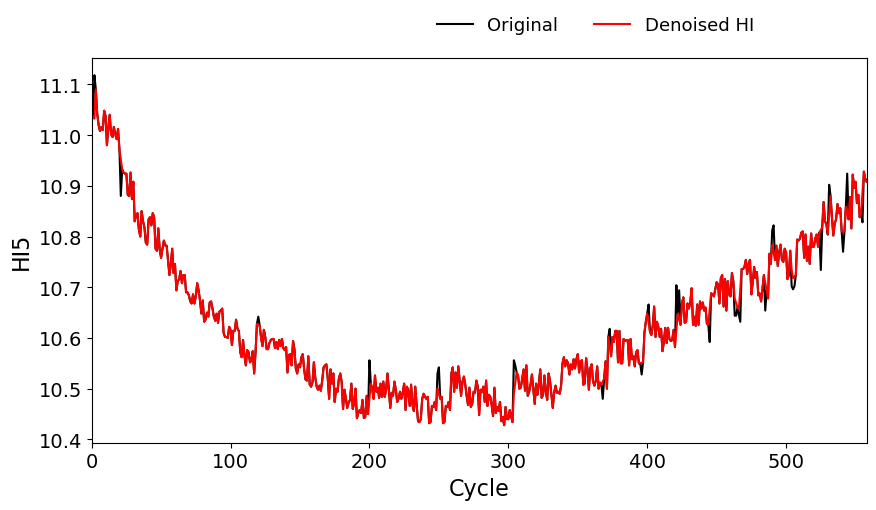

In [361]:
x= data['Cycle']
y= data['CCVIS']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['CCVIS']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI5",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI5",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if (-2)*std<=t<=2*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CCVIS'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_CCVIS=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_CCVIS,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI5",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(558,)


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            WLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.977
Date:                Wed, 06 Mar 2024   Prob (F-statistic):             0.0193
Time:                        15:45:56   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0599      3.835      1.319      0.1

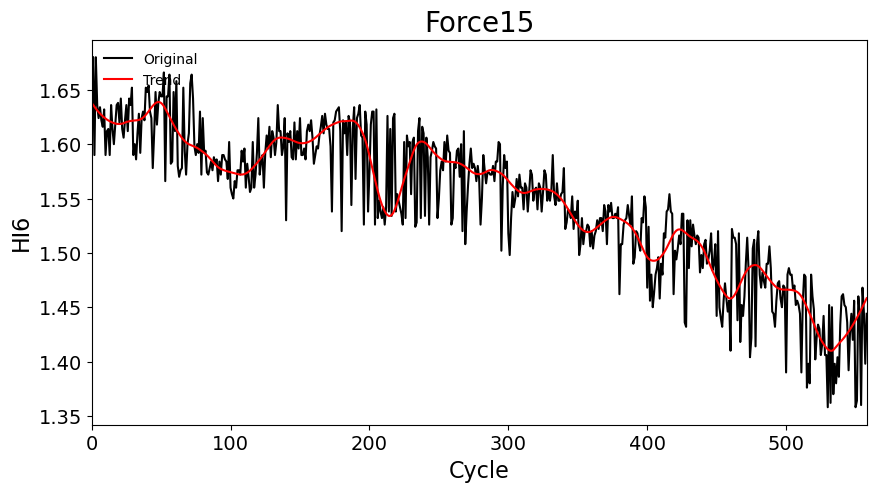

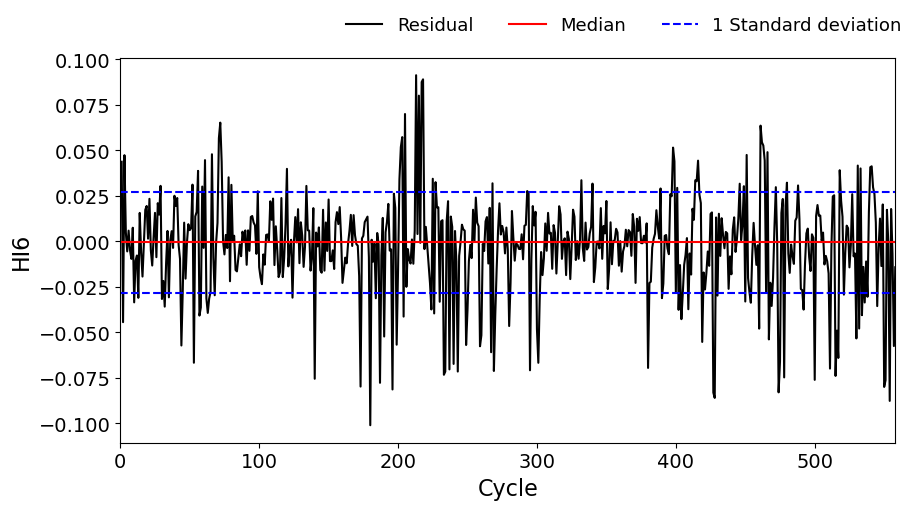

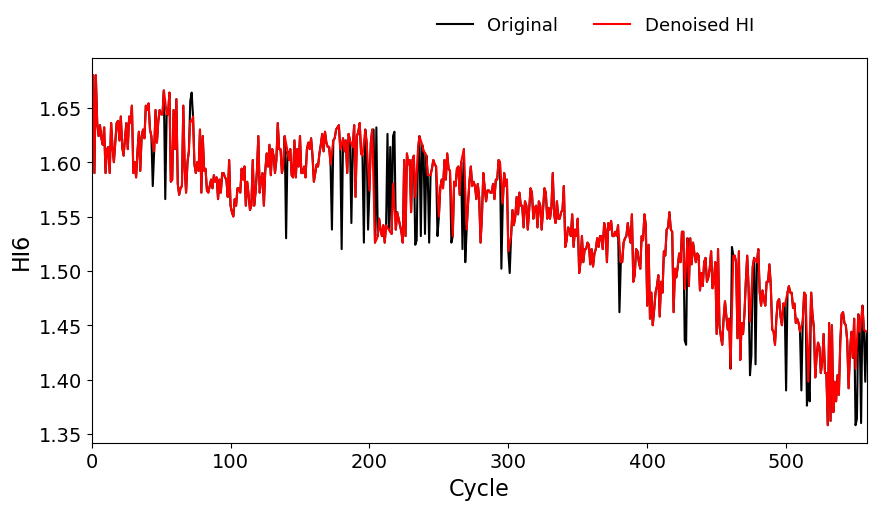

In [362]:
x= data['Cycle']
y= data['CCVES']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['CCVES']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI6",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI6",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if (-2)*std<=t<=2*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CCVES'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_CCVES=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_CCVES,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI6",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(558,)


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            WLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     8.191
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           0.000312
Time:                        15:45:59   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1481      0.063     -2.355      0.0

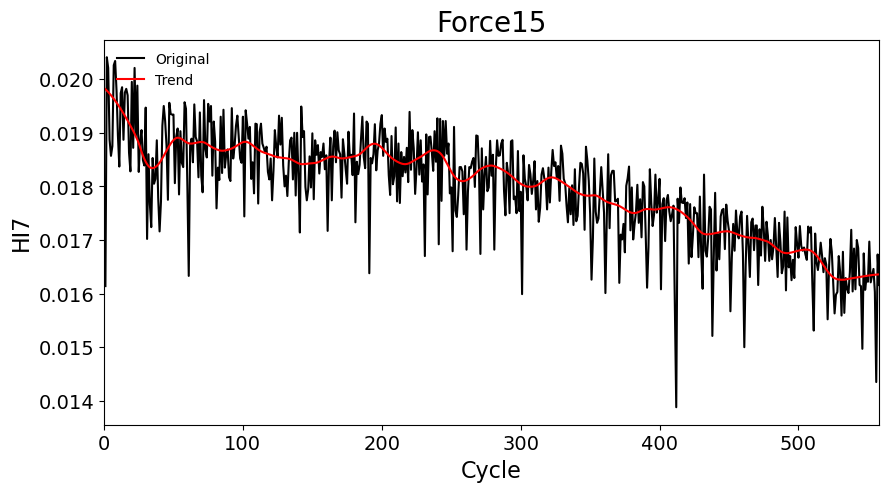

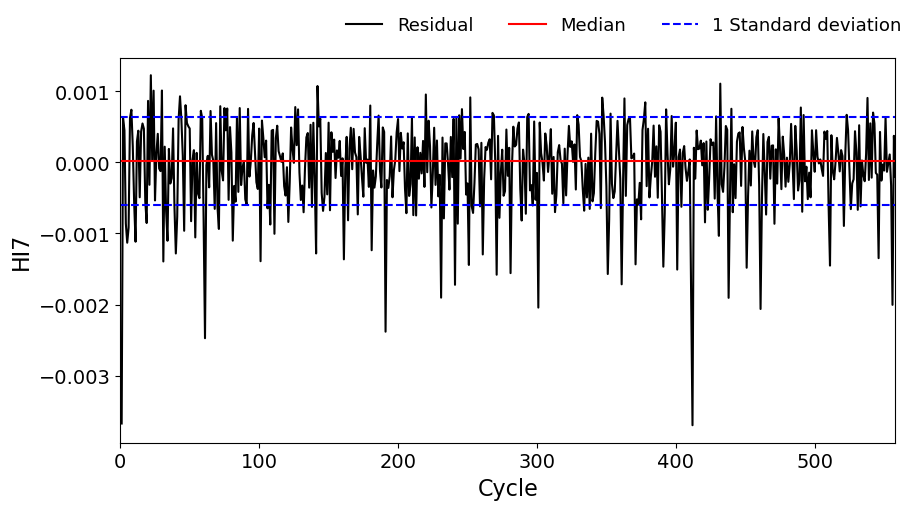

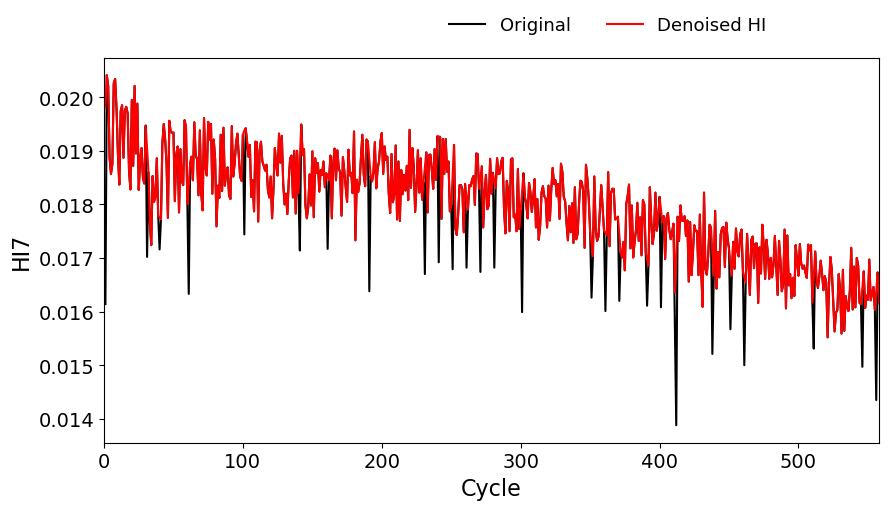

In [363]:
x= data['Cycle']
y= data['CVIS (dt)']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['CVIS (dt)']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if (-2)*std<=t<=2*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CVIS (dt)'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_CVIS=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_CVIS,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(558,)


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.060
Model:                            WLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     17.74
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           3.40e-08
Time:                        15:46:02   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0091      0.004      2.315      0.0

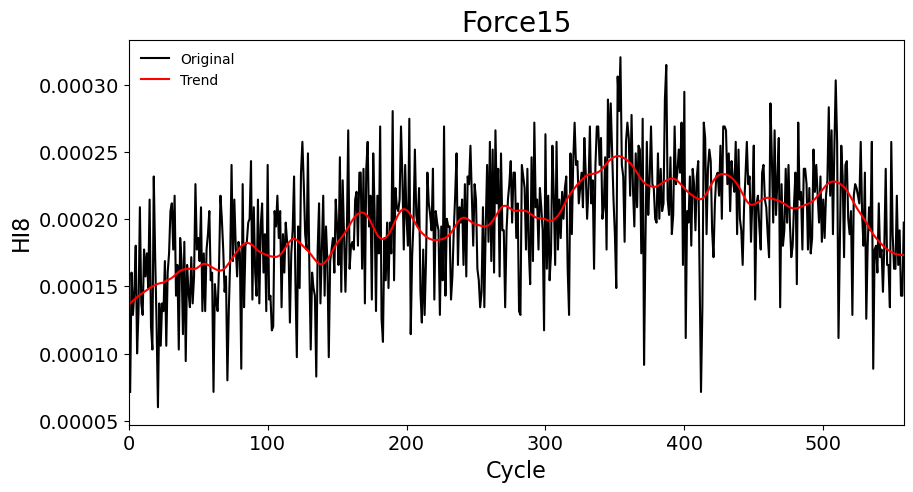

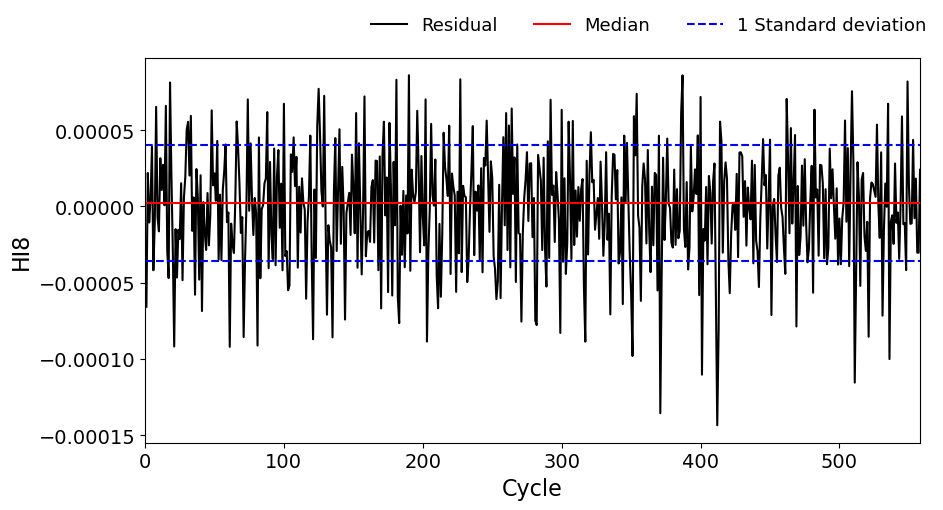

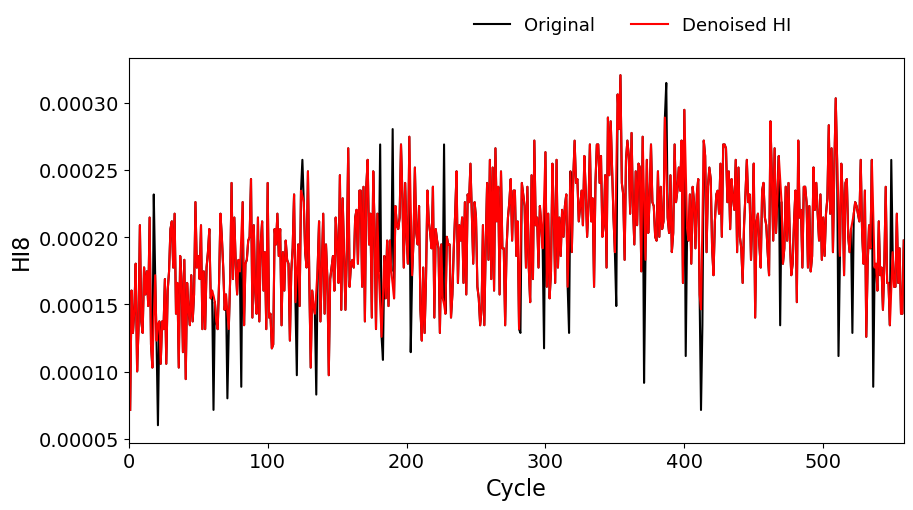

In [364]:
x= data['Cycle']
y= data['CVES (dt)']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['CVES (dt)']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI8",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI8",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if (-2)*std<=t<=2*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CVES (dt)'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_CVES=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_CVES,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI8",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(558,)


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.551
Model:                            WLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     340.9
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           2.63e-97
Time:                        15:46:04   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0303      0.251      8.074      0.0

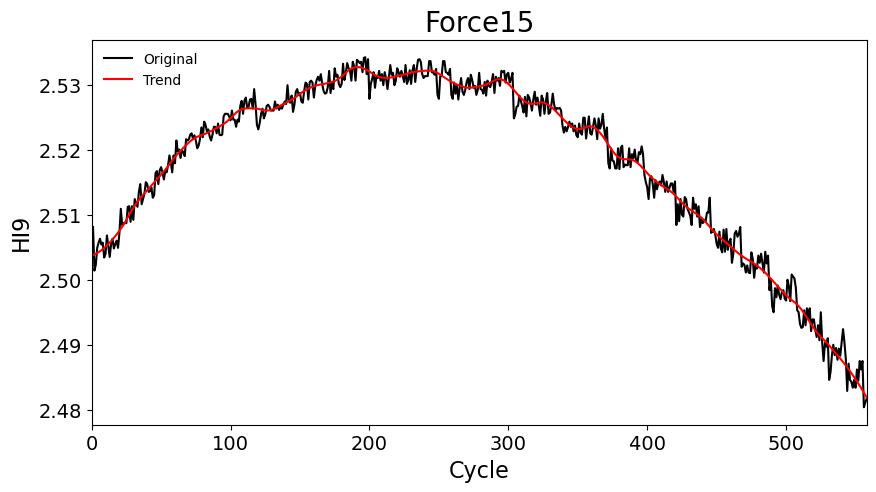

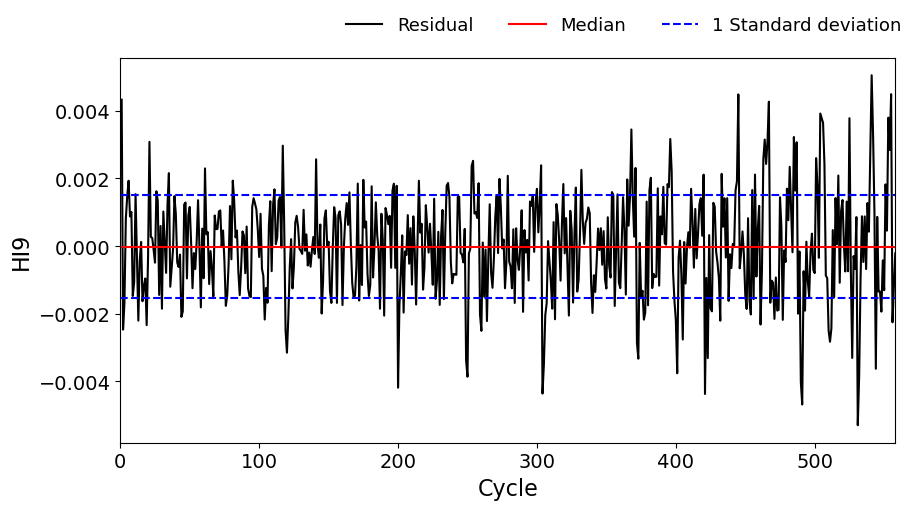

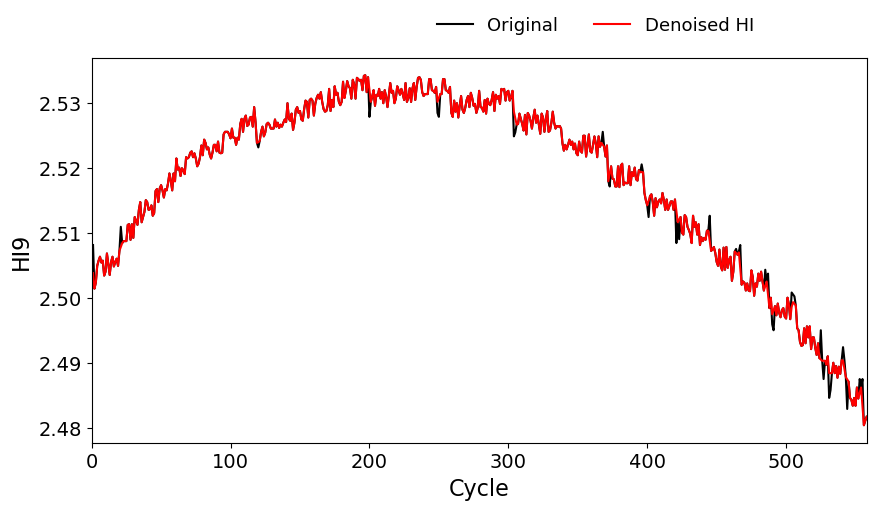

In [365]:
x= data['Cycle']
y= data['DIV']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['DIV']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI9",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI9",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if (-2)*std<=t<=2*std:
        denoised_val=data.loc[data['Cycle']==cycle,'DIV'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_DIV=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_DIV,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI9",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


In [366]:
df = pd.DataFrame({'HI1': y_denoised_max, 'HI2': y_denoised_min, 'HI3': y_denoised_maxmin,
                  'HI4': y_denoised_civ, 'HI5': y_denoised_CCVIS, 'HI6': y_denoised_CCVES,
                  'HI7': y_denoised_CVIS, 'HI8': y_denoised_CVES, 'HI9': y_denoised_DIV})

print(df)

            HI1         HI2        HI3       HI4        HI5       HI6  \
0    1357.50000  1285.90000  70.940750  2.707436  11.036000  1.680000   
1    1357.70000  1285.90000  70.974476  2.700800  11.032241  1.590000   
2    1357.70000  1286.00000  71.008122  2.704800  11.090000  1.680000   
3    1357.80000  1286.50000  71.041666  2.706500  11.042000  1.636000   
4    1357.90000  1286.70000  71.498560  2.707100  11.020000  1.624000   
..          ...         ...        ...       ...        ...       ...   
553  1474.01238  1408.88011  68.016940  2.928400  10.846000  1.455972   
554  1474.37071  1409.21711  68.172180  2.929000  10.887044  1.468000   
555  1475.76866  1409.65740  68.342430  2.933310  10.928000  1.446000   
556  1476.11786  1409.38332  68.447586  2.937800  10.914000  1.444914   
557  1475.99312  1410.17343  68.447586  2.938000  10.908000  1.444000   

          HI7       HI8       HI9  
0    0.019814  0.000072  2.503777  
1    0.020410  0.000160  2.501400  
2    0.020210  

In [367]:
from sklearn.preprocessing import MinMaxScaler

In [368]:
# 예제 데이터프레임 생성 (558, 9) 형태라고 가정
# data = pd.DataFrame(...)

# MinMaxScaler 인스턴스 생성
scaler = MinMaxScaler()

# 데이터 정규화 수행
data_normalized = scaler.fit_transform(df)

# 정규화된 데이터를 다시 DataFrame으로 변환
data_norm_denoised = pd.DataFrame(data_normalized, columns=df.columns)

# 정규화된 데이터 확인
data_norm_denoised.head()

,HI1,HI2,HI3,HI4,HI5,HI6,HI7,HI8,HI9
0,0.000000,0.000000,0.461193,0.034085,0.918429,1.000000,0.878108,0.000000,0.434508
1,0.001686,0.000000,0.466513,0.006284,0.912751,0.720497,1.000000,0.356514,0.390335
2,0.001686,0.000805,0.471820,0.023041,1.000000,1.000000,0.959100,0.229977,0.407063
3,0.002529,0.004828,0.477111,0.030163,0.927492,0.863354,0.685072,0.298769,0.455390
4,0.003372,0.006437,0.549180,0.032677,0.894260,0.826087,0.623722,0.436856,0.470260


In [369]:
data=pd.read_csv("./data_paper/Force15kgf.csv")

print(data.shape)

# data가 pandas DataFrame이고, shape이 (558, 13)이라고 가정합니다.

# 'cycle', 'soh', 'DVSOC50' 열을 제외하고 나머지 데이터만 유지
# 여기서 'cycle'이 2개 있다고 하셨으니, 구체적인 열 이름이 필요할 수 있습니다.
# 예를 들어, 'cycle1', 'cycle2' 같이 구분이 되어 있다면 아래와 같이 작성합니다.
data_reduced = data.drop(['Unnamed: 0', 'Cycle', 'SOH', 'DVSOC50'], axis=1)

# 결과 확인
print(data_reduced.shape)  # 이제 (558, 9)가 되어야 합니다.
data_reduced.head()

(558, 13)
(558, 9)


,max.,min.,max.-min.,CIV,CCVIS,CCVES,CVIS (dt),CVES (dt),DIV
0,1357.5,1283.5,72.82119,2.4414,11.036,1.680,0.01614,0.000072,2.5081
1,1357.7,1285.9,72.41452,2.7008,11.118,1.590,0.02041,0.000160,2.5014
2,1357.7,1286.0,72.05853,2.7048,11.090,1.680,0.02021,0.000129,2.5023
3,1357.8,1286.5,71.75321,2.7065,11.042,1.636,0.01887,0.000146,2.5049
4,1357.9,1286.7,71.49856,2.7071,11.020,1.624,0.01857,0.000180,2.5057


In [370]:
# 예제 데이터프레임 생성 (558, 9) 형태라고 가정
# data = pd.DataFrame(...)

# MinMaxScaler 인스턴스 생성
scaler = MinMaxScaler()

# 데이터 정규화 수행
data_normalized = scaler.fit_transform(data_reduced)

# 정규화된 데이터를 다시 DataFrame으로 변환
data_normalized = pd.DataFrame(data_normalized, columns=data_reduced.columns)

# 정규화된 데이터 확인
data_normalized.head()

,max.,min.,max.-min.,CIV,CCVIS,CCVES,CVIS (dt),CVES (dt),DIV
0,0.023061,0.008609,0.757808,0.000000,0.881159,1.000000,0.346095,0.043789,0.514870
1,0.024708,0.027392,0.693661,0.448014,1.000000,0.720497,1.000000,0.384692,0.390335
2,0.024708,0.028175,0.637508,0.454922,0.959420,1.000000,0.969372,0.263696,0.407063
3,0.025532,0.032088,0.589348,0.457858,0.889855,0.863354,0.764165,0.329476,0.455390
4,0.026355,0.033653,0.549180,0.458895,0.857971,0.826087,0.718224,0.461515,0.470260


In [371]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
import os
import random


def build_autoencoder(input_dim, encoding_dim):
    # 입력 레이어
    input_layer = Input(shape=(input_dim,))
    
    # 인코더 레이어: 입력을 encoding_dim 차원으로 압축, He 초기화 사용
    encoded = Dense(encoding_dim[0], activation='elu')(input_layer)
    encoded = Dense(encoding_dim[1], activation='elu')(encoded)
    
    # 디코더 레이어: encoding_dim 차원을 다시 입력 차원으로 복원, He 초기화 사용
    decoded = Dense(encoding_dim[0], activation='elu')(encoded)
    decoded = Dense(input_dim, activation='elu')(decoded)
    
    # 오토인코더 모델 생성
    autoencoder = Model(input_layer, decoded)
    
    # 인코더 모델 생성
    encoder = Model(input_layer, encoded)
    
    # 디코더 모델 생성
    encoded_input = Input(shape=(encoding_dim[1],))
    decoder_layer1 = autoencoder.layers[-2](encoded_input)
    decoder_layer2 = autoencoder.layers[-1](decoder_layer1)
    decoder = Model(encoded_input, decoder_layer2)
    
    return autoencoder, encoder, decoder

# 모델 구축
input_dim = 9  # 입력 차원
encoding_dim = [6, 4]  # 인코더의 두 레이어에서의 차원
autoencoder, encoder, decoder = build_autoencoder(input_dim, encoding_dim)

# 모델 컴파일
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "model_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 9)]               0         
_________________________________________________________________
dense_60 (Dense)             (None, 6)                 60        
_________________________________________________________________
dense_61 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_62 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_63 (Dense)             (None, 9)                 63        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [372]:
# data.shape는 (558, 9)입니다.

# 첫 277개 행을 훈련 데이터로 사용
X_train = data_norm_denoised
X_test=data_norm_denoised

# 모델 훈련
autoencoder.fit(X_train, X_train, epochs=200, batch_size=32,validation_data=(X_train,X_train))

# 테스트 데이터에 대한 재구성
reconstructed = autoencoder.predict(X_test)




Train on 558 samples, validate on 558 samples
Epoch 1/200
558/558 [==============================] - 0s 589us/sample - loss: 0.3779 - val_loss: 0.3242
Epoch 2/200
558/558 [==============================] - 0s 151us/sample - loss: 0.2876 - val_loss: 0.2498
Epoch 3/200
558/558 [==============================] - 0s 104us/sample - loss: 0.2254 - val_loss: 0.1997
Epoch 4/200
558/558 [==============================] - 0s 103us/sample - loss: 0.1817 - val_loss: 0.1617
Epoch 5/200
558/558 [==============================] - 0s 114us/sample - loss: 0.1473 - val_loss: 0.1316
Epoch 6/200
558/558 [==============================] - 0s 103us/sample - loss: 0.1206 - val_loss: 0.1086
Epoch 7/200
558/558 [==============================] - 0s 97us/sample - loss: 0.1004 - val_loss: 0.0914
Epoch 8/200
558/558 [==============================] - 0s 99us/sample - loss: 0.0851 - val_loss: 0.0783
Epoch 9/200
558/558 [==============================] - 0s 72us/sample - loss: 0.0737 - val_loss: 0.0686
Epoch 10/200

558/558 [==============================] - 0s 62us/sample - loss: 0.0044 - val_loss: 0.0044
Epoch 79/200
558/558 [==============================] - 0s 63us/sample - loss: 0.0044 - val_loss: 0.0043
Epoch 80/200
558/558 [==============================] - 0s 63us/sample - loss: 0.0043 - val_loss: 0.0043
Epoch 81/200
558/558 [==============================] - 0s 63us/sample - loss: 0.0043 - val_loss: 0.0043
Epoch 82/200
558/558 [==============================] - 0s 63us/sample - loss: 0.0043 - val_loss: 0.0043
Epoch 83/200
558/558 [==============================] - 0s 62us/sample - loss: 0.0043 - val_loss: 0.0043
Epoch 84/200
558/558 [==============================] - 0s 61us/sample - loss: 0.0043 - val_loss: 0.0043
Epoch 85/200
558/558 [==============================] - 0s 62us/sample - loss: 0.0043 - val_loss: 0.0043
Epoch 86/200
558/558 [==============================] - 0s 63us/sample - loss: 0.0043 - val_loss: 0.0042
Epoch 87/200
558/558 [==============================] - 0s 63us/samp

558/558 [==============================] - 0s 67us/sample - loss: 0.0035 - val_loss: 0.0035
Epoch 156/200
558/558 [==============================] - 0s 68us/sample - loss: 0.0035 - val_loss: 0.0034
Epoch 157/200
558/558 [==============================] - 0s 65us/sample - loss: 0.0034 - val_loss: 0.0034
Epoch 158/200
558/558 [==============================] - 0s 67us/sample - loss: 0.0034 - val_loss: 0.0034
Epoch 159/200
558/558 [==============================] - 0s 67us/sample - loss: 0.0034 - val_loss: 0.0034
Epoch 160/200
558/558 [==============================] - 0s 68us/sample - loss: 0.0034 - val_loss: 0.0033
Epoch 161/200
558/558 [==============================] - 0s 69us/sample - loss: 0.0034 - val_loss: 0.0033
Epoch 162/200
558/558 [==============================] - 0s 69us/sample - loss: 0.0033 - val_loss: 0.0033
Epoch 163/200
558/558 [==============================] - 0s 65us/sample - loss: 0.0033 - val_loss: 0.0033
Epoch 164/200
558/558 [==============================] - 0s 

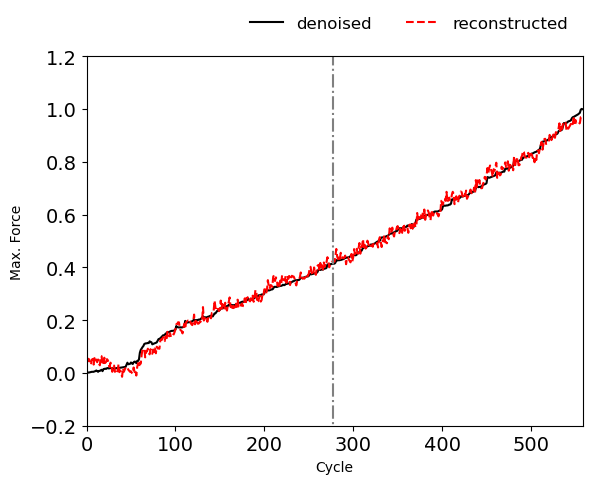

In [373]:

y= reconstructed[:,0]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI1']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("Max. Force")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

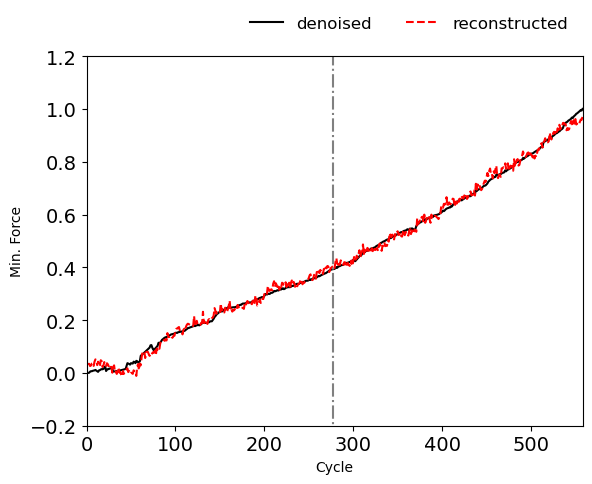

In [374]:
y= reconstructed[:,1]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI2']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("Min. Force")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

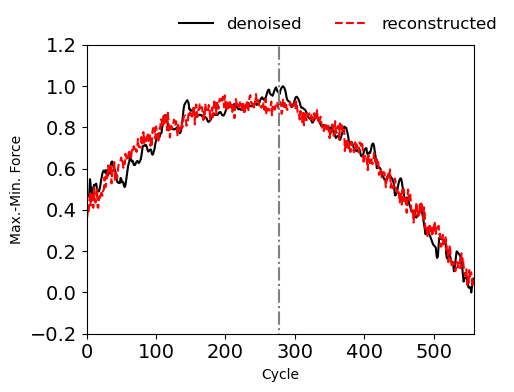

In [375]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,2]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI3']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("Max.-Min. Force")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

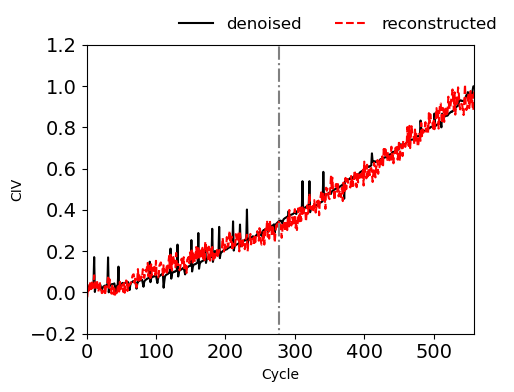

In [376]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,3]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI4']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("CIV")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

<Figure size 500x375 with 0 Axes>

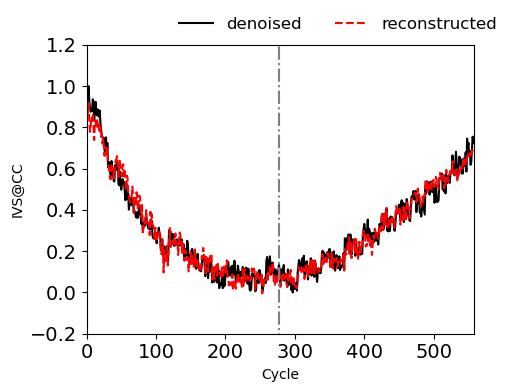

In [377]:
plt.figure(figsize=(5,3.75))
plt.figure(figsize=(5,3.75))
y= reconstructed[:,4]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI5']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("IVS@CC")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

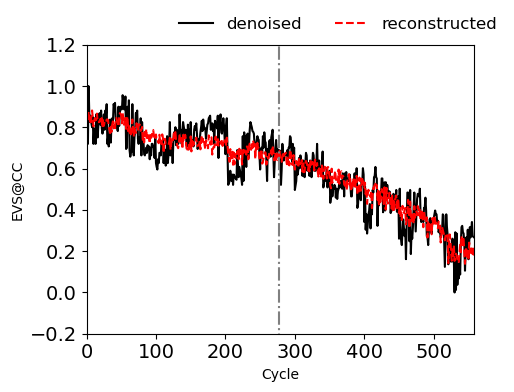

In [378]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,5]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI6']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("EVS@CC")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

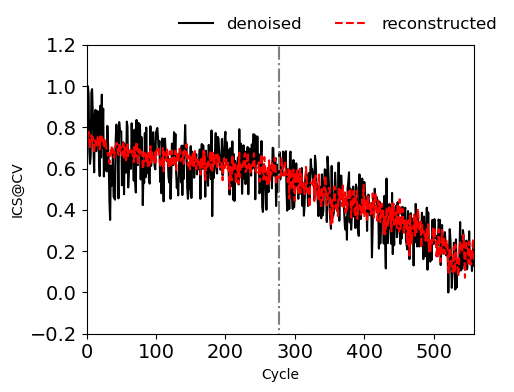

In [379]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,6]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI7']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("ICS@CV")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

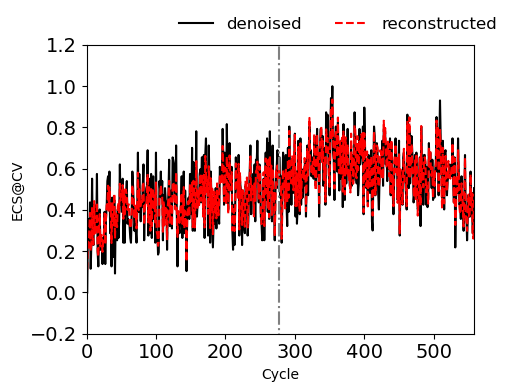

In [380]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,7]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI8']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("ECS@CV")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

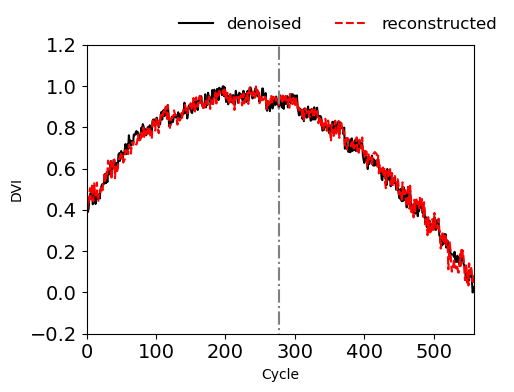

In [381]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,8]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI9']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("DVI")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()